In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_x = pd.read_csv("../DreemSleepStageClassificationChallengeData/dreem-sleep-stages/train_x.csv",
                     index_col = "id")
train_y = pd.read_csv("../DreemSleepStageClassificationChallengeData/dreem-sleep-stages/train_y.csv",
                     index_col = "id")

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

- Learning rate
- n_estimator
- subsample
- max_depth
- max_features

In [5]:
gtboost = GradientBoostingClassifier()
gtboost.fit(train_x, np.ravel(train_y))

GradientBoostingClassifier()

In [6]:
gtboost.score(train_x, np.ravel(train_y))

0.7385933296769307

In [8]:
cv_scores = []
lr_cv = np.arange(0.1, 1.0, 0.1)
for rate in tqdm(lr_cv):
    gtb_class = GradientBoostingClassifier(learning_rate = rate)
    cv_scores.append(cross_val_score(gtb_class,
                                    train_x, np.ravel(train_y),
                                    scoring = make_scorer(f1_score, average = "macro"),
                                    cv = 5))

 67%|██████▋   | 6/9 [11:11:59<5:36:18, 6726.08s/it]C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 506, in fit
    sample_weight_val, begin_at_stage, monitor)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 563, in _fit_stages
    random_state, X_csc, X_csr)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 192, in _fit_stage
    sample_weight=sample_weight)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 720, in negative_gradient
 

Traceback (most recent call last):
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-d97624734706>", line 8, in <module>
    cv = 5))
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 445, in cross_val_score
    error_score=error_score)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 252, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\joblib\parallel.py", line 924, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:

KeyboardInterrupt: 

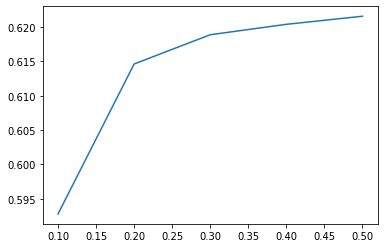

In [12]:
plt.plot(lr_cv[0:5], [np.mean(x) for x in cv_scores[0:5]])

In [13]:
cv_scores = []
lr_cv = np.arange(0.5, 1.0, 0.1)
for rate in tqdm(lr_cv):
    gtb_class = GradientBoostingClassifier(learning_rate = rate)
    cv_scores.append(cross_val_score(gtb_class,
                                    train_x, np.ravel(train_y),
                                    scoring = make_scorer(f1_score, average = "macro"),
                                    cv = 5))


100%|██████████| 5/5 [9:43:07<00:00, 6997.55s/it]  


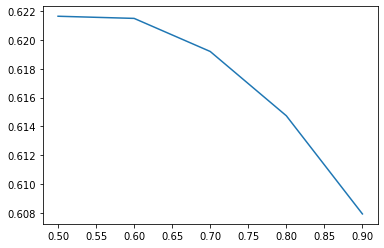

In [15]:
plt.plot(lr_cv[0:5], [np.mean(x) for x in cv_scores[0:5]])

In [5]:
cv_scores = []
lr_cv = 0.5
depth_cv = np.arange(1, 11, 1)
for depth in tqdm(depth_cv):
    gtb_class = GradientBoostingClassifier(learning_rate = lr_cv,
                                          max_depth = depth)
    cv_scores.append(cross_val_score(gtb_class,
                                    train_x, np.ravel(train_y),
                                    scoring = make_scorer(f1_score, average = "macro"),
                                    cv = 5))

 70%|███████   | 7/10 [17:18:03<9:07:02, 10940.93s/it]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-1bcd8da19094>", line 10, in <module>
    cv = 5))
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 445, in cross_val_score
    error_score=error_score)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 252, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "C:\Users\zhouj\Anaconda3\lib\site-packages\joblib\parallel.py", line 924, in __call__
    while self.dispatch_one_batch(iterator):
  File "C

KeyboardInterrupt: 

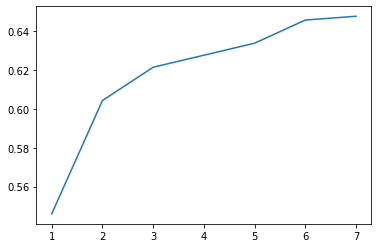

In [10]:
plt.plot(depth_cv[0:7], [np.mean(x) for x in cv_scores[0:7]])

In [11]:
gtb_cv = GradientBoostingClassifier(learning_rate = lr_cv,
                                          max_depth = 7)
gtb_cv.fit(train_x, np.ravel(train_y))

GradientBoostingClassifier(learning_rate=0.5, max_depth=7)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_pred_y = gtb_cv.predict(train_x)
print("Accuracy: " + str(accuracy_score(train_y, train_pred_y)))
print("Precision: " + str(precision_score(train_y, train_pred_y, average = "macro")))
print("Recall: " + str(recall_score(train_y, train_pred_y, average = "macro")))
print("F1: " + str(f1_score(train_y, train_pred_y, average = "macro")))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [13]:
test_x = pd.read_csv("../DreemSleepStageClassificationChallengeData/dreem-sleep-stages/test_x.csv",
                     index_col = "id")

In [15]:
test_pred_y = gtb_cv.predict(test_x)

In [17]:
test_pred_y = pd.DataFrame({"sleep_stage": test_pred_y})
test_pred_y.index.name = "id"
test_pred_y

,sleep_stage
id,
0,0
1,2
2,2
3,0
4,4
...,...
37434,1
37435,0
37436,4


In [18]:
test_pred_y.to_csv("../DreemSleepStageClassificationChallengeData/dreem-sleep-stages/test_pred_y_gtb.csv")